In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/GOOG_test.csv')
data_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/GOOG_train.csv')

In [ ]:
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
1,2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2,2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
3,2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
4,2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [ ]:
a = np.array([])
for i in np.arange(len(data_train.index)):
  a = np.append(a, data_train.loc[[i]].isnull().sum() )
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
data_train.describe()


,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2702.674255,2730.161156,2672.508566,2700.858899,2700.858899,1.303822e+06
std,207.658815,202.614255,208.531935,205.434607,205.434607,5.369361e+05
min,2102.840088,2127.899902,2044.160034,2116.790039,2116.790039,5.933000e+05
25%,2596.669922,2618.074951,2550.070068,2584.800049,2584.800049,9.462000e+05
50%,2742.194092,2767.989990,2714.000000,2740.090088,2740.090088,1.182100e+06
75%,2864.020020,2885.959961,2834.699951,2856.060059,2856.060059,1.512400e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


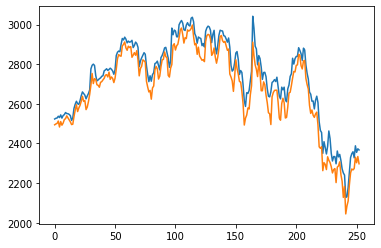

In [ ]:
plt.plot(data_train['High'])
plt.plot(data_train['Low'])
plt.show()

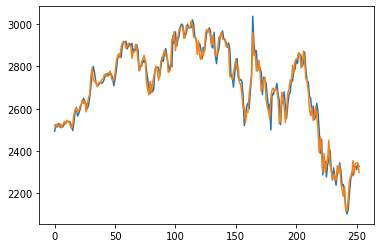

In [ ]:
plt.plot(data_train['Open'])
plt.plot(data_train['Close'])
plt.show()

In [ ]:
linear_model = LinearRegression()

In [ ]:
X_train = np.vstack((data_train['Open'],data_train['High'],data_train['Low'])).T
y_train = data_train['Close']
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test = np.vstack((data_test['Open'],data_test['High'],data_test['Low'])).T
sc = preprocessing.StandardScaler()
sc.fit(X_test)
X_test = sc.transform(X_test)
y_test = data_test['Close']

In [ ]:
y_train_predicted = linear_model.predict(X_train)
y_test_predicted = linear_model.predict(X_test)

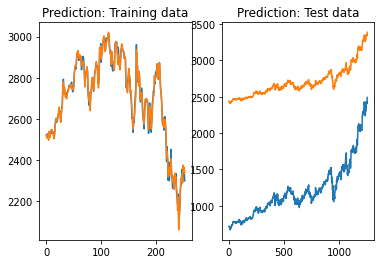

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].set_title('Prediction: Training data')
axes[0].plot(y_train)
axes[0].plot(y_train_predicted)
axes[1].set_title('Prediction: Test data')
axes[1].plot(y_test)
axes[1].plot(y_test_predicted)
plt.show()

In [ ]:
metrics.mean_squared_error(y_train,y_train_predicted)

324.6926694840677

In [ ]:
from math import sqrt
sqrt(metrics.mean_squared_error(y_test,y_test_predicted))

1497.8255240547555